Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# TensorFlow/Keras imports
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

# Set seaborn style
sns.set()

Exploração de Dados

# Google

In [ ]:
dataset = 'suddharshan/historical-stock-price-of-10-popular-companies'
csv_file = 'Google.csv'

!kaggle datasets download -d {dataset} --unzip

dfgoogle = pd.read_csv(csv_file, index_col=0)

dfgoogle.drop(labels=['Close'], axis=1, inplace=True)
dfgoogle['Volume'] = dfgoogle['Volume'].astype(float)

print(df.head())

Dataset URL: https://www.kaggle.com/datasets/suddharshan/historical-stock-price-of-10-popular-companies
License(s): CC0-1.0
  0% 0.00/350k [00:00<?, ?B/s]
100% 350k/350k [00:00<00:00, 111MB/s]
                  open        high         low   adj close     volume
Date                                                                 
2015-01-02  527.561584  529.815369  522.665039  523.373108  1447563.0
2015-01-05  521.827332  522.894409  511.655243  512.463013  2059840.0
2015-01-06  513.589966  514.761719  499.678131  500.585632  2899940.0
2015-01-07  505.611847  505.855164  498.281952  499.727997  2065054.0
2015-01-08  496.626526  502.101471  489.655640  501.303680  3353582.0


In [ ]:
dfgoogle.rename(columns={'Open': 'open', 'High': 'high', 'Low':'low',  'Adj Close': 'adj close', 'Volume':'volume'}, inplace=True)
dfgoogle['volume'] = dfgoogle['volume'].astype(float)

dfgoogle.head()

,open,high,low,adj close,volume
Date,,,,,
2015-01-02,527.561584,529.815369,522.665039,523.373108,1447563.0
2015-01-05,521.827332,522.894409,511.655243,512.463013,2059840.0
2015-01-06,513.589966,514.761719,499.678131,500.585632,2899940.0
2015-01-07,505.611847,505.855164,498.281952,499.727997,2065054.0
2015-01-08,496.626526,502.101471,489.655640,501.303680,3353582.0


In [ ]:
dfgoogle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1761 entries, 2015-01-02 to 2021-12-29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       1761 non-null   float64
 1   high       1761 non-null   float64
 2   low        1761 non-null   float64
 3   adj close  1761 non-null   float64
 4   volume     1761 non-null   float64
dtypes: float64(5)
memory usage: 82.5+ KB


<ipython-input-244-be38917f85ad>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(411)


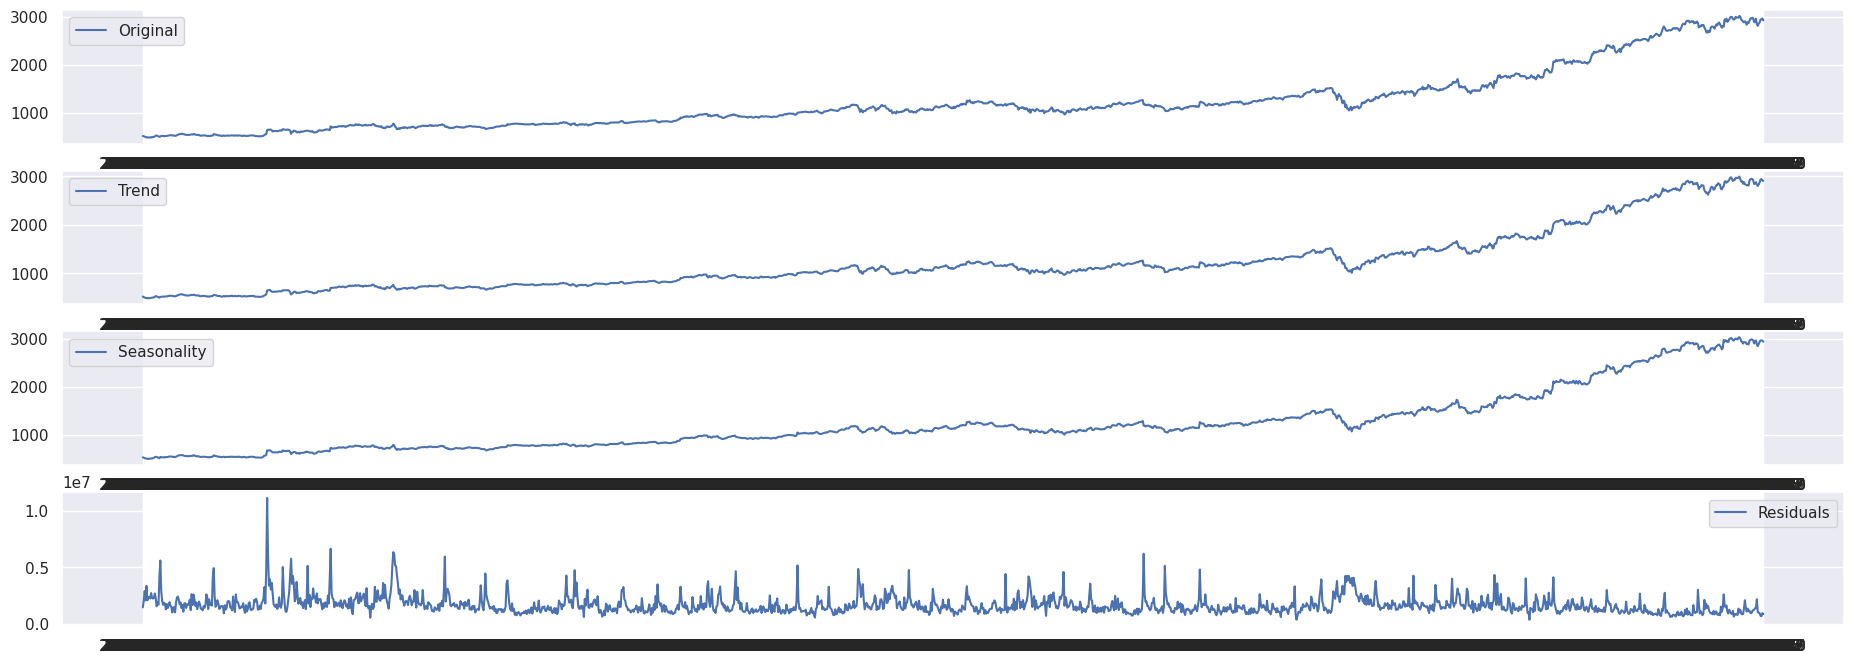

In [ ]:
dfgoogle.plot(figsize=(23,8),title = "Google Stock Price Analysis")
plt.subplot(411)
plt.plot(dfgoogle.open, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(dfgoogle.low, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(dfgoogle.high,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(dfgoogle.volume, label='Residuals')
plt.legend(loc='best')
# plt.tight_layout()
plt.show()

Normalização

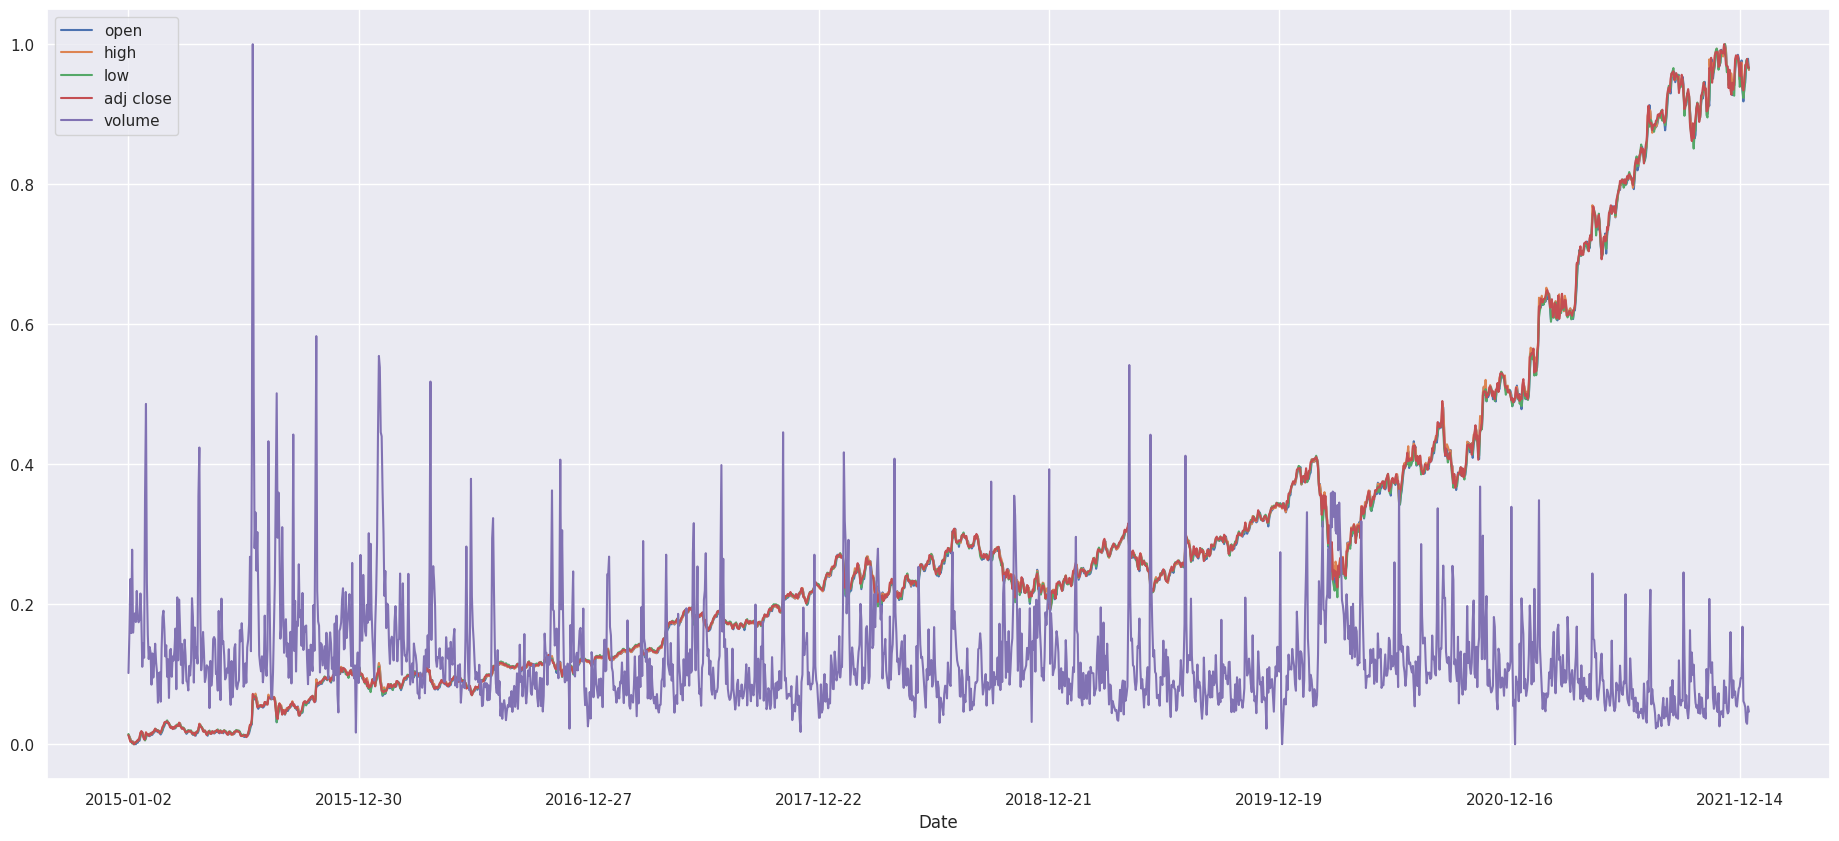

In [ ]:
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    df['adj close'] = min_max_scaler.fit_transform(df['adj close'].values.reshape(-1,1))
    return df
dfgoogle = normalize_data(dfgoogle)
dfgoogle.plot(figsize=(23,10))
plt.show()

In [ ]:
del dfgoogle['volume']
def load_data(stock, window):
    data = stock.to_numpy()
    result = []

    for index in range(len(data) - window): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + window]) # index : index + n days

    result = np.array(result).reshape(4*window, -1)
    row = round(0.9 * result.shape[1]) # 90% split

    x_train = result[:, :int(row)]
    y_train = data[window:window+int(row),3].reshape(-1, 1)

    x_test = result[:, int(row):]
    y_test = data[window+int(row):,3].reshape(-1, 1)
    return [x_train, y_train, x_test, y_test]

TRaining and Testing Data

In [ ]:
x_train, y_train, x_test, y_test = load_data(dfgoogle.iloc[:1760,:], 10)

In [ ]:
x_train

array([[0.01356151, 0.01384424, 0.0145091 , ..., 0.03172115, 0.03213903,
        0.03408884],
       [0.02399917, 0.02304037, 0.02283274, ..., 0.01944433, 0.01965083,
        0.01777587],
       [0.01815976, 0.01756462, 0.01758093, ..., 0.0284261 , 0.03385092,
        0.03136538],
       ...,
       [0.80591475, 0.8070693 , 0.79978271, ..., 0.88475131, 0.8836257 ,
        0.88149388],
       [0.89861104, 0.89669928, 0.89568091, ..., 0.93034405, 0.92408694,
        0.92973991],
       [0.91599925, 0.92630142, 0.93034405, ..., 0.93912069, 0.95451011,
        0.94748894]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(40, 1575)
(1575, 1)


Criação da REde Neural

Modelo Sequential com os Layers conv1d e flatten

In [ ]:
stock = dfgoogle.iloc[:1760,:]
window = 10
data = stock.to_numpy()
result = []

for index in range(len(data) - window): # maxmimum date = lastest date - sequence length
    result.append(data[index: index + window]) # index : index + n days

result = np.array(result).reshape(4*window, -1)
x = result.T
y = data[window:,3]
print(x.shape)
print(y.shape)

(1750, 40)
(1750,)


In [ ]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)
(1750, 40, 1)

(1750, 40, 1)


(1750, 40, 1)

In [ ]:
x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn=train_test_split(x, y, test_size=0.1)
print(x_train_cnn.shape)
print(x_test_cnn.shape)
print(y_train_cnn.shape)
print(y_test_cnn.shape)

(1575, 40, 1)
(175, 40, 1)
(1575,)
(175,)


In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(40, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.summary()
model.compile(loss="mse", optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 39, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │          79,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,097 (312.88 KB)

 Trainable params: 80,097 (312.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x_train_cnn, y_train_cnn, batch_size=12,epochs=200, validation_data=(x_test_cnn, y_test_cnn))

Epoch 1/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0480 - val_loss: 0.0138
Epoch 2/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129 - val_loss: 0.0125
Epoch 3/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 4/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 - val_loss: 0.0092
Epoch 5/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 6/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 7/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 8/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 9/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0046
Epoch 10/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0039 - val_loss: 0.0060
Epoch 11/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0053
Epoch 12/200
132/132 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred_cnn = model.predict(x_test_cnn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
0.0012786549050360918
MSE: 0.0014


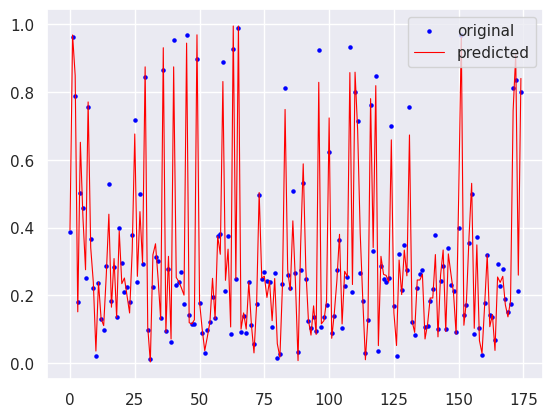

In [ ]:
print(model.evaluate(x_train_cnn, y_train_cnn))

print("MSE: %.4f" % mean_squared_error(y_test_cnn, y_pred_cnn))
x_ax = range(len(y_pred_cnn))
plt.scatter(x_ax, y_test_cnn, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_cnn, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


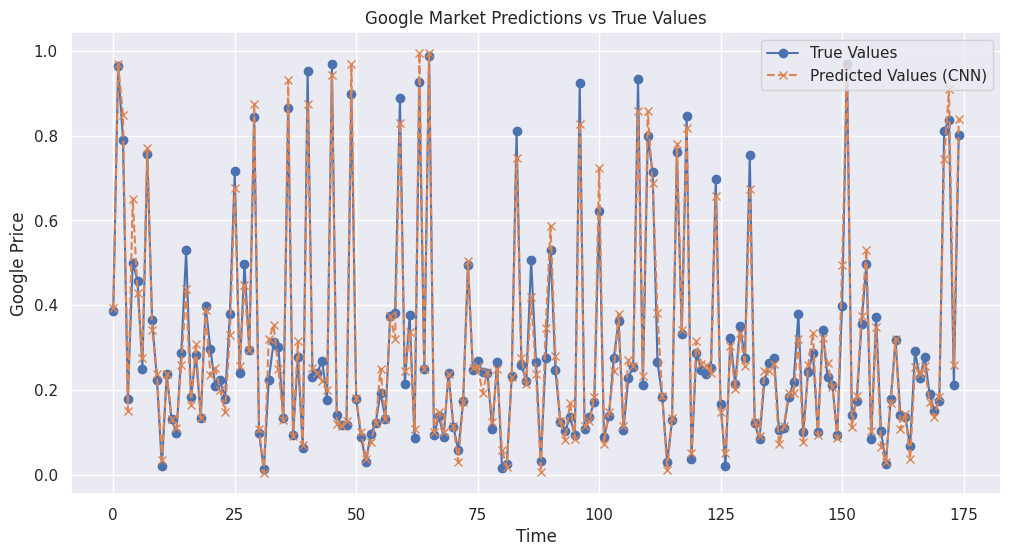

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_google_cnn = model.predict(x_test_cnn)

y_pred_google_cnn = y_pred_cnn.squeeze()

# Use the length of y_test_cnn to create the date range.
dates = np.arange(len(y_test_cnn))

plt.figure(figsize=(12, 6))
plt.plot(dates, y_test_cnn, label='True Values', marker='o', linestyle='-')
plt.plot(dates, y_pred_google_cnn, label='Predicted Values (CNN)', linestyle='--', marker='x')
plt.title('Google Market Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Google Price')
plt.legend()
plt.grid(True)
plt.show()

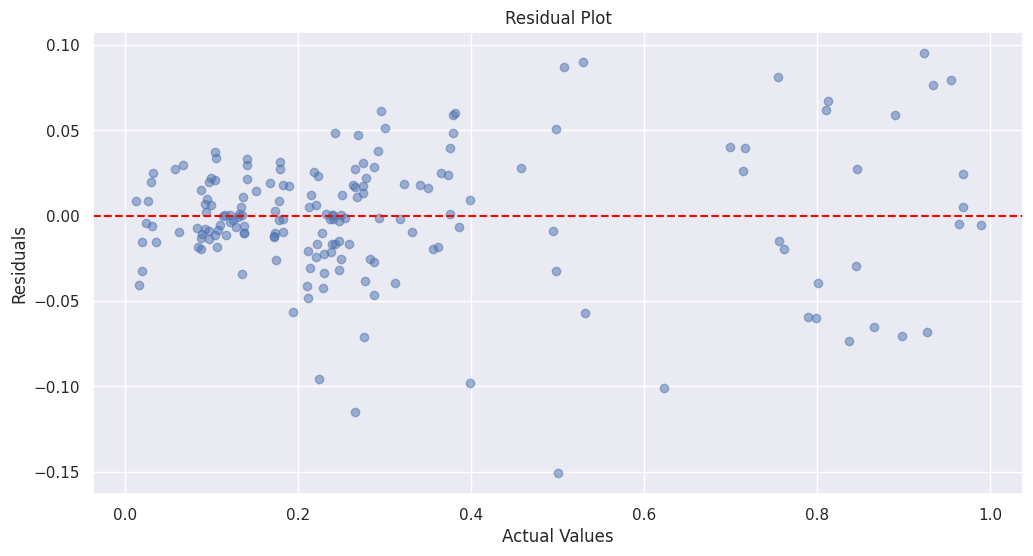

In [ ]:
residuals = y_test_cnn - y_pred_google_cnn


y_pred = np.array(y_pred_google_cnn)
residuals = np.array(residuals)
plt.figure(figsize=(12, 6))
plt.scatter(y_test_cnn, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0 for reference
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## Depêndencia entre resíduos

# Netflix

In [ ]:
dfnetflix = pd.read_csv("https://raw.githubusercontent.com/adriel1ft/stock-prediction-cnn/main/Netflix.csv", index_col = 0)

"""
netflix já tem a coluna adj close
dfnetflix["adj close"] = dfnetflix.close # Moving close to the last column
dfnetflix.drop(labels=['close'], axis=1, inplace=True) # Moving close to the last column
"""

dfnetflix.rename(columns={'Open': 'open', 'High': 'high', 'Low':'low', 'Close': 'close', 'Adj Close': 'adj close', 'Volume':'volume'}, inplace=True)
dfnetflix.drop(labels=['close'], axis=1, inplace=True)

dfnetflix['volume'] = dfnetflix['volume'].astype(float)

dfnetflix.head()

,open,high,low,adj close,volume
Date,,,,,
2015-01-02,49.151428,50.331429,48.731430,49.848572,13475000.0
2015-01-05,49.258572,49.258572,47.147144,47.311428,18165000.0
2015-01-06,47.347141,47.639999,45.661430,46.501431,16037700.0
2015-01-07,47.347141,47.421429,46.271427,46.742859,9849700.0
2015-01-08,47.119999,47.835712,46.478573,47.779999,9601900.0


<ipython-input-268-893497c3ac3d>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(411)


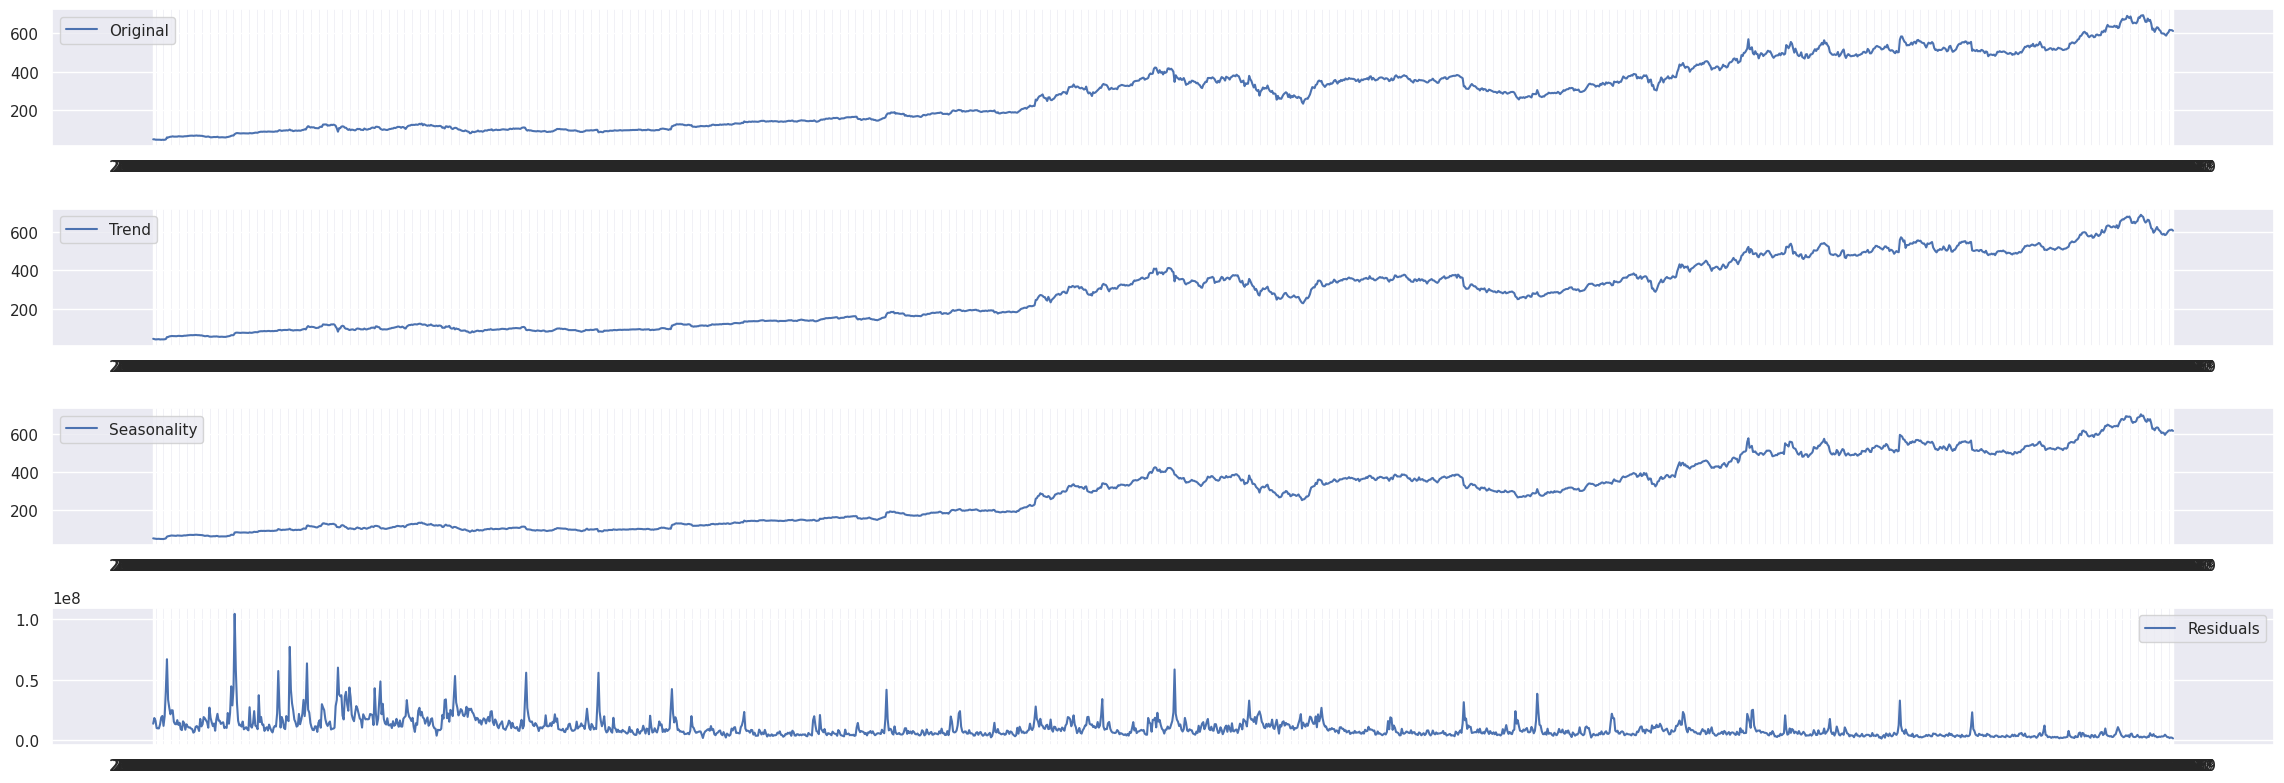

In [ ]:
dfnetflix.plot(figsize=(23,8),title = "Netflix Stock Price Analysis")
plt.subplot(411)
plt.plot(dfnetflix.open, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(dfnetflix.low, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(dfnetflix.high,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(dfnetflix.volume, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

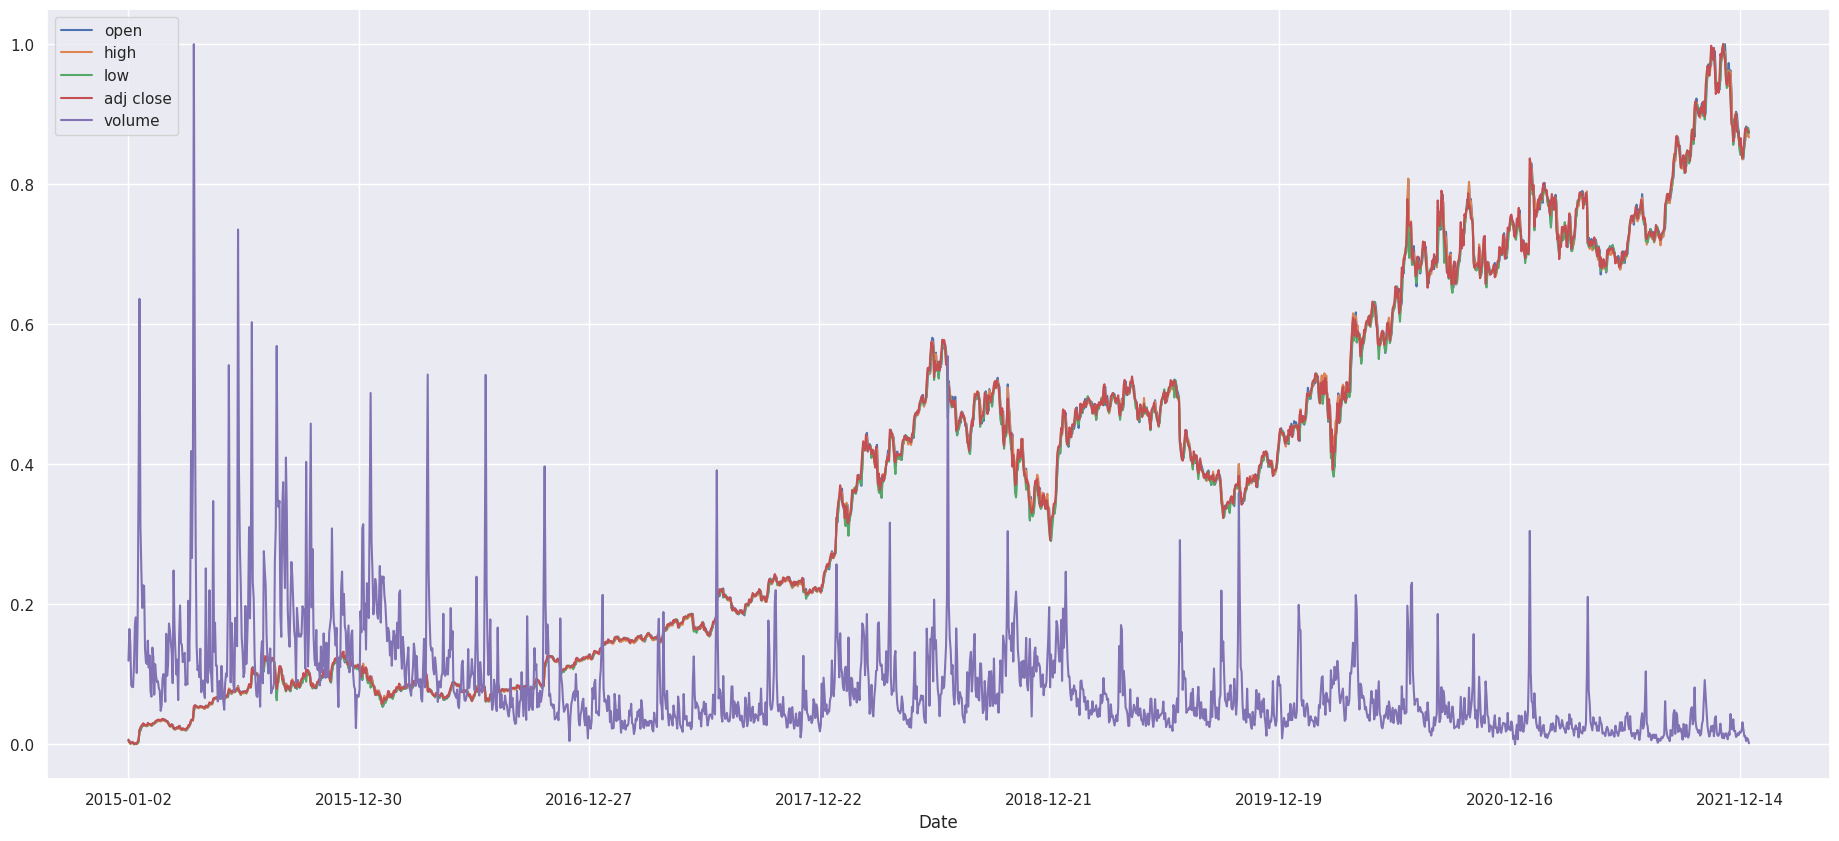

In [ ]:
dfnetflix = normalize_data(dfnetflix)
dfnetflix.plot(figsize=(23,10))
plt.show()

In [ ]:
del dfnetflix['volume']

In [ ]:
stock = dfnetflix.iloc[:1760,:]
window = 10
data = stock.to_numpy()
result = []

for index in range(len(data) - window): # maxmimum date = lastest date - sequence length
    result.append(data[index: index + window]) # index : index + n days

result = np.array(result).reshape(4*window, -1)
x = result.T
y = data[window:,3]
print(x.shape)
print(y.shape)

x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)
(1750, 40, 1)

x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn=train_test_split(x, y, test_size=0.1)
print(x_train_cnn.shape)
print(x_test_cnn.shape)
print(y_train_cnn.shape)
print(y_test_cnn.shape)

(1750, 40)
(1750,)
(1750, 40, 1)
(1575, 40, 1)
(175, 40, 1)
(1575,)
(175,)


In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(40, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.summary()
model.compile(loss="mse", optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 39, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │          79,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,097 (312.88 KB)

 Trainable params: 80,097 (312.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
histnetflix = model.fit(x_train_cnn, y_train_cnn, batch_size=12,epochs=200, validation_data=(x_test_cnn, y_test_cnn))

Epoch 1/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0848 - val_loss: 0.0101
Epoch 2/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0087 - val_loss: 0.0071
Epoch 3/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - val_loss: 0.0067
Epoch 4/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0068 - val_loss: 0.0057
Epoch 5/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 6/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 7/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 8/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 9/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 10/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 11/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 12/200
132/132 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred_netflix_cnn = model.predict(x_test_cnn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022
0.002083315048366785
MSE: 0.0020


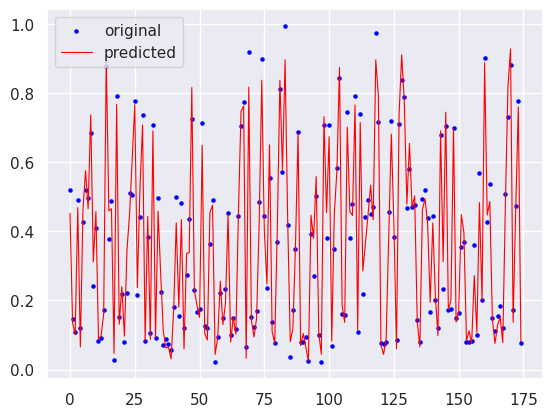

In [ ]:
print(model.evaluate(x_train_cnn, y_train_cnn))

print("MSE: %.4f" % mean_squared_error(y_test_cnn, y_pred_netflix_cnn))
x_ax = range(len(y_pred_netflix_cnn))
plt.scatter(x_ax, y_test_cnn, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_netflix_cnn, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

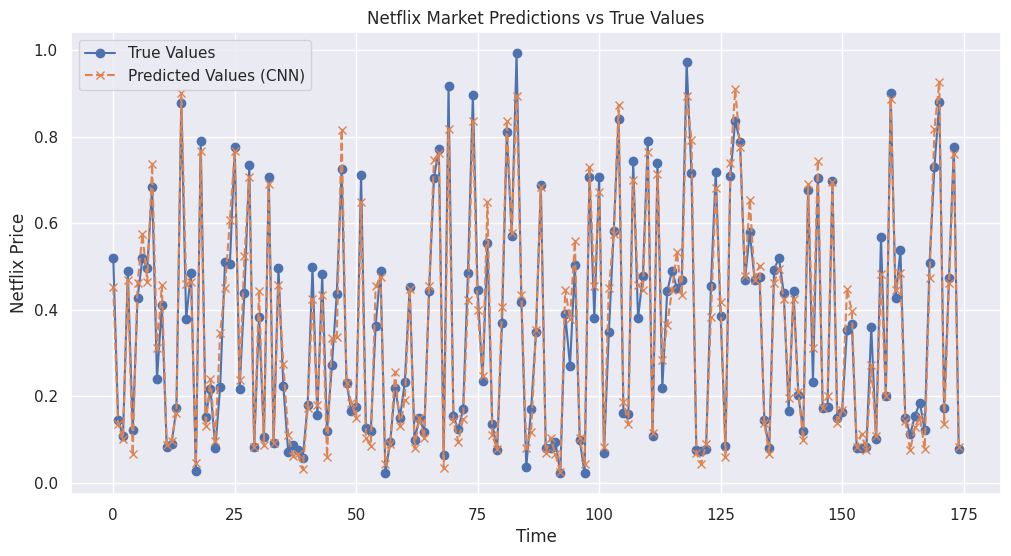

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_netflix_cnn = y_pred_netflix_cnn.squeeze()

dates = np.arange(len(y_test_cnn))

plt.figure(figsize=(12, 6))
plt.plot(dates, y_test_cnn, label='True Values', marker='o', linestyle='-')
plt.plot(dates, y_pred_netflix_cnn, label='Predicted Values (CNN)', linestyle='--', marker='x')
plt.title('Netflix Market Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Netflix Price')
plt.legend()
plt.grid(True)
plt.show()

# Comparando os dois

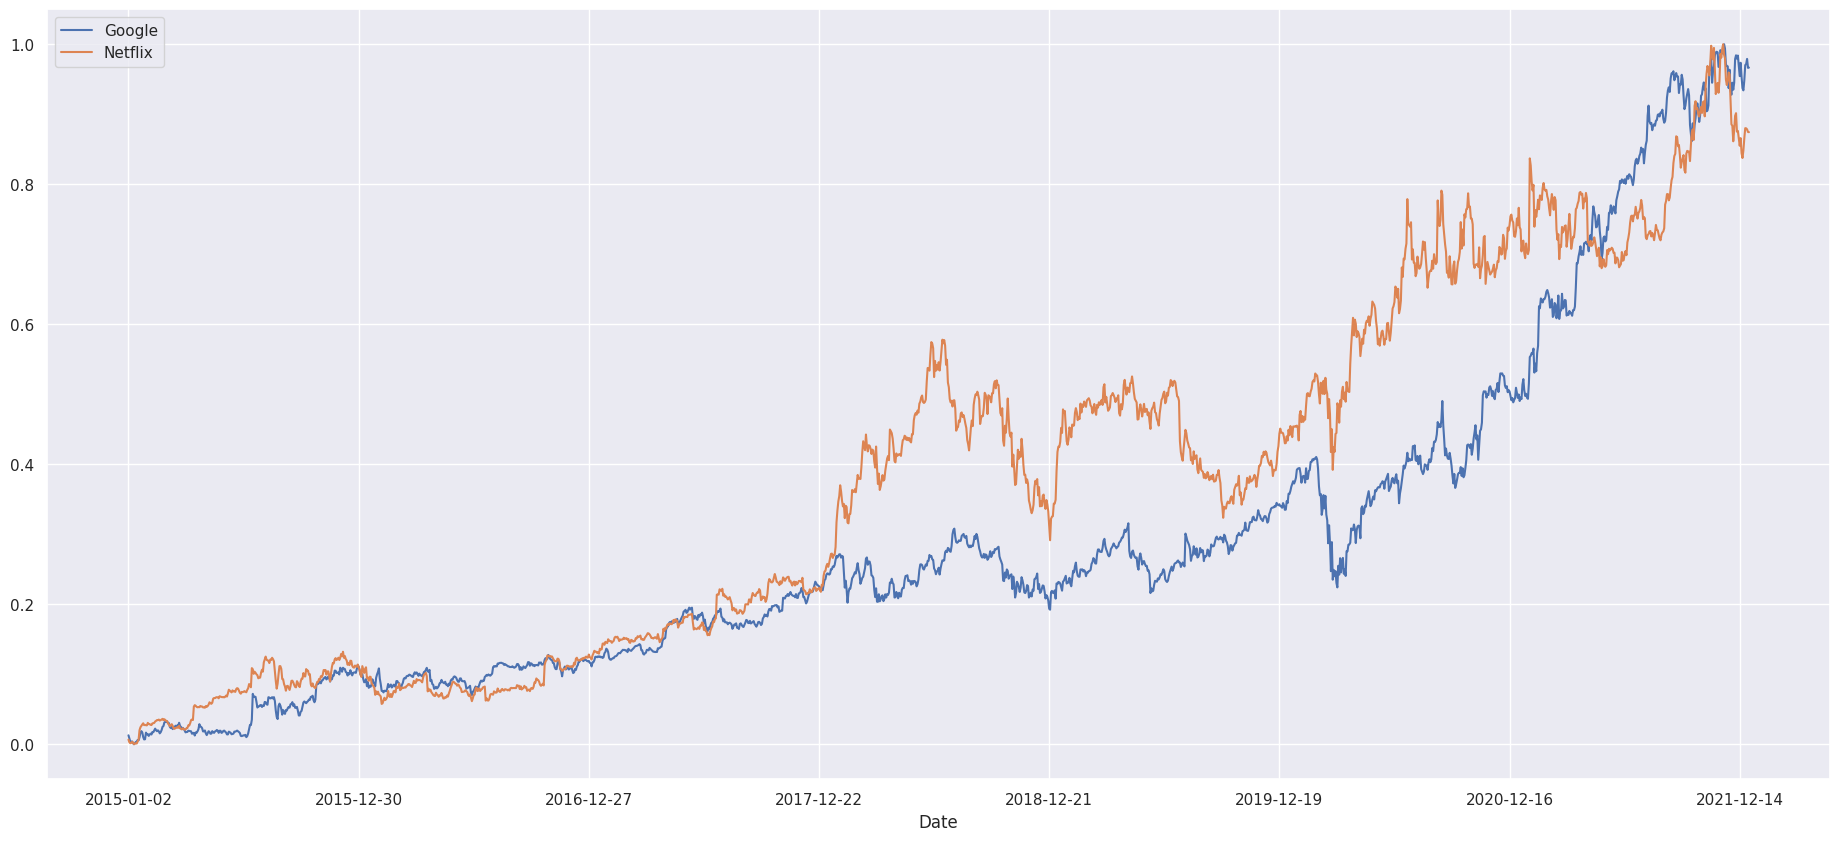

In [ ]:
dfnetflix = normalize_data(dfnetflix)
dfgoogle['adj close'].plot(figsize=(23,10))
dfnetflix['adj close'].plot(figsize=(23,10))

plt.legend(['Google', 'Netflix'])
plt.show()